<a href="https://colab.research.google.com/github/aman-makode-11/MLPractice/blob/main/BonusAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Aman Makode                                                      
Roll No. : 34  (3rd year/6th Sem)    
Subject : Machine Learning Lab  
Reg No. : 22070221  


**Bonus Assignment 6**




---


**Problem Statement :** Explore a dataset with a higher number of features (e.g., Wine Quality dataset).



1.   Preprocess the data, handle missing values, and scale the features.
2.   Train a Decision Tree Classifier and visualize the tree.


3.  Evaluate the model's performance using accuracy, precision, recall, and F1-score.

4.   Experiment with hyperparameter tuning to improve performance. perform these practical














**Output** :

In [1]:
from google.colab import files
files.upload()

Saving WineQT.csv to WineQT.csv


{'WineQT.csv': b'fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0\r\n7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1\r\n7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2\r\n11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3\r\n7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4\r\n7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5\r\n7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5,6\r\n7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7\r\n7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8\r\n6.7,0.58,0.08,1.8,0.09699999999999999,15.0,65.0,0.9959,3.28,0.54,9.2,5,10\r\n5.6,0.615,0.0,1.6,0.08900000000000001,16.0,59.0,0.9943,3.58,0.52,9.9,5,12\r\n7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,13\r\n8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.3,0.75,10.5,7,16\r\n7.9,

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [4]:
# Step 1: Load Dataset
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Step 2: Data Preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
# Separate features and target (Assuming 'quality' is the target column)
X = df.drop(columns=["quality"])
y = df["quality"]

In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Step 3: Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for simplicity
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

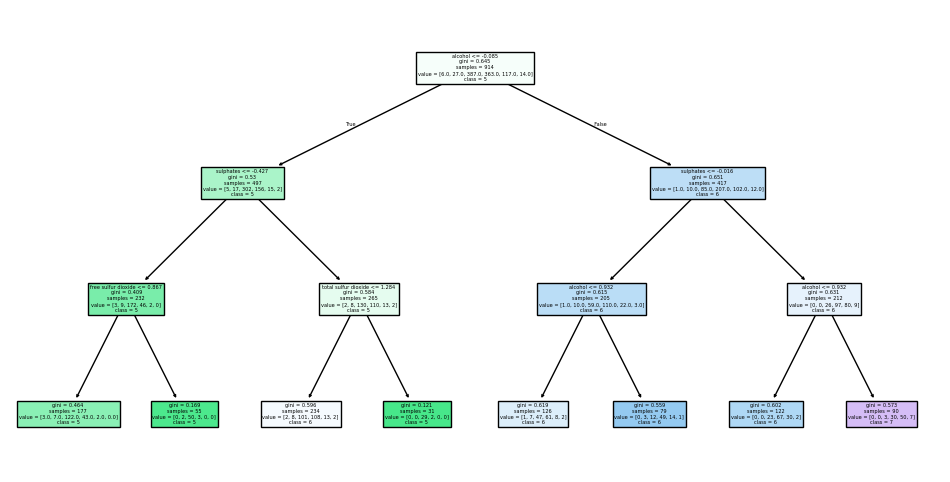

In [16]:
# Step 4: Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], filled=True)
plt.show()



In [17]:
# Step 5: Evaluate Model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

In [18]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.58
Precision: 0.63
Recall: 0.58
F1 Score: 0.57
Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.80      0.54      0.65        96
           6       0.53      0.77      0.63        99
           7       0.25      0.19      0.22        26
           8       1.00      0.00      0.00         2

    accuracy                           0.58       229
   macro avg       0.72      0.30      0.30       229
weighted avg       0.63      0.58      0.57       229



In [19]:
# Step 6: Hyperparameter Tuning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Step 7: Evaluate the Best Model
best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
recall_best = recall_score(y_test, y_pred_best, average='weighted', zero_division=1)
f1_best = f1_score(y_test, y_pred_best, average='weighted', zero_division=1)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy (CV): {grid_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy_best:.2f}")
print(f"Test Precision: {precision_best:.2f}")
print(f"Test Recall: {recall_best:.2f}")
print(f"Test F1 Score: {f1_best:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy (CV): 0.58
Test Accuracy: 0.55
Test Precision: 0.54
Test Recall: 0.55
Test F1 Score: 0.54
